# 深度学习中的优化挑战

```{note}
在深度学习中，大多数目标函数都很复杂，没有解析解，必须用数值优化算法，一般来说是梯度下降类算法<br/>
本节我们用画图来直观的展现深度学习中的优化挑战：局部最小值、鞍点和梯度消失，共同点是梯度等于或接近0，但不是最优点<br/>
```

## 画图函数

In [1]:
import d2l


#@save
def plot(X, Y, xlabel=None, ylabel=None, legend=None, xlim=None,
         ylim=None, xscale='linear', yscale='linear',
         fmts=('-', 'm--', 'g-.', 'r:'), figsize=(3.5, 2.5), axes=None):
    """
    画折线图
    参数都是matplotlib画图的参数
    """
    d2l.use_svg_display()
    plt.rcParams['figure.figsize'] = figsize
    # 可自定义坐标轴
    axes = axes if axes else plt.gca()

    # Return True if `Z` (tensor or list) has 1 axis
    def has_one_axis(Z):
        return (hasattr(Z, "ndim") and Z.ndim == 1 or
                isinstance(Z, list) and not hasattr(Z[0], "__len__"))

    if has_one_axis(X):
        X = [X]
    if has_one_axis(Y):
        Y = [Y]
    if len(X) == 1:
        X = X * len(Y)
    axes.cla()
    for x, y, fmt in zip(X, Y, fmts):
        axes.plot(x, y, fmt)
    d2l.set_axes(axes, xlabel, ylabel, xlim, ylim, xscale, yscale, legend)

In [2]:
#@save
def annotate(text, xy, xytext):
    """
    画箭头做标注
    :param text: 文本
    :param xy: 要指向的位置
    :param xytext: 文本的位置
    """
    plt.gca().annotate(text, xy=xy, xytext=xytext,
                       arrowprops=dict(arrowstyle='->'))

## 局部最小值

In [3]:
import torch
import numpy as np


def f(x):
    return x * torch.cos(np.pi * x)

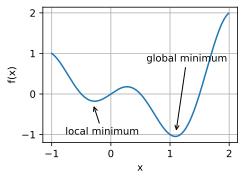

In [4]:
x = torch.arange(-1.0, 2.0, 0.01)
d2l.plot(x, [f(x),], 'x', 'f(x)')
d2l.annotate('local minimum', (-0.3, -0.25), (-0.77, -1.0))
d2l.annotate('global minimum', (1.1, -0.95), (0.6, 0.8))

## 鞍点

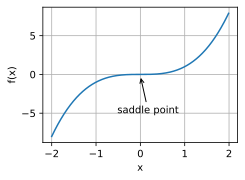

In [5]:
x = torch.arange(-2.0, 2.0, 0.01)
d2l.plot(x, [x**3], 'x', 'f(x)')
d2l.annotate('saddle point', (0, -0.2), (-0.52, -5.0))

## 梯度消失

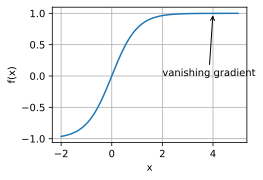

In [6]:
x = torch.arange(-2.0, 5.0, 0.01)
d2l.plot(x, [torch.tanh(x)], 'x', 'f(x)')
d2l.annotate('vanishing gradient', (4, 1), (2, 0.0))